# Ross Ice Shelf, Antarctica

*This GNSS site has been removed by the project investigators.*

**Station Name:**  lorg

**Location:**  Lorne, Antarctica

**Archive:**  [UNAVCO](http://www.unavco.org)

**DOI:**  [https://doi.org/10.7283/ACF6-YT23](https://doi.org/10.7283/ACF6-YT23)

**Ellipsoidal Coordinates:**

- Latitude:  -78.18365
- Longitude: 170.03361
- Height:  	-7.778 m

[Station Page at UNAVCO](https://www.unavco.org/instrumentation/networks/status/nota/overview/lorg)

[Station Page at Nevada Geodetic Laboratory](http://geodesy.unr.edu/NGLStationPages/stations/LORG.sta)

[Google Maps Link](https://goo.gl/maps/bSAuLXLLMmzWqPdW9) 

<img src="https://gnss-reflections.org/static/images/LORG.jpg" width="500">



### Data Summary

Station lorg is on the Ross Ice Shelf, Antarctica. The site is a largely featureless ice plain with no obstructions (see photo above). The site was installed on November 27, 2018 and decommissioned on November 15, 2019. It recorded only GPS frequencies during its operation.

LORG is an example station on the GNSSIR webapp.

Because there are no significant topographic features near the station, so it is recommended to use default values for the elevation mask. An azimuth mask is not required.

If you are curious about the position time series for the antenna, you can use `download_unr'

### Imports

In [4]:
import ipywidgets as widgets
import os

from pathlib import Path

from gnssrefl.utils import check_environment, set_environment, get_sys

notebook_dir = Path.cwd().parents[1]

# Making sure environment variables are set - this is required to run the gnssrefl code
exists = check_environment()
if exists == False:
    set_environment(refl_code=str(notebook_dir),
                    orbits=str(notebook_dir / "orbits"),
                    exe=str(notebook_dir / "exe"))
    
#If you are running this locally - make sure the items in the exe folder have execution permissions

# Set local variable of refl_code location
refl_code_loc = os.environ['REFL_CODE']
print("refl_code location:", refl_code_loc)

# import gnssrefl functions
from gnssrefl.installexe_cl import installexe
from gnssrefl.rinex2snr_cl import rinex2snr
from gnssrefl.quickLook_cl import quicklook
from gnssrefl.gnssir_cl import gnssir
from gnssrefl.gnssir_input import make_gnssir_input
from gnssrefl.daily_avg_cl import daily_avg


# import the crx2rnx file which is dependent on your working OS - this is required to run the gnssrefl code
# If in docker environment, then you do not need to download crxnrnx
try:
    os.environ['DOCKER']
except KeyError:
    sys = get_sys()
    installexe(sys)

refl_code location: /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks


**Fast Mode:** 
this will download data weekly instead of daily

In [6]:
weekly = widgets.Checkbox(value=True, description='Fast Mode', disabled=False, indent=False)
weekly

Checkbox(value=True, description='Fast Mode', indent=False)

Deselect the Fast Mode checkbox to deactivate fast mode.

## Take a look at the Data


First, we'll make a SNR file. Let's choose day of year 205 in the year 2019 to look at.

In [7]:
station = 'lorg'
year = 2019
doy = 205

In [8]:
rinex2snr(station, year, doy)

lorg  year: 2019  doy: 205 from:  all
Requested a GPS only nav file
Corrupted file/download failures at SOPAC
SOPAC download did not work, so will try CDDIS
Try the unix compressed version
Try the gzipped version
Change the filename to what we use  auto2050.19n
Orbit file:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits/2019/nav/auto2050.19n
https://data.unavco.org/archive/gnss/rinex/obs/2019/205/lorg2050.19d.Z
Seeking permission from Earthscope to use their archive


SUCCESS: SNR file was created 
 /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2019/snr/lorg/lorg2050.19.snr66
That took  5.51  seconds
Feedback written to subdirectory logs


Use **quickLook** to produce a periodogram - quickLook is set to use the L1 frequency by default:

minimum elevation angle (degrees) for this dataset:  0.0053
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lorg/quickLook_lsp.png
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lorg/quickLook_summary.png


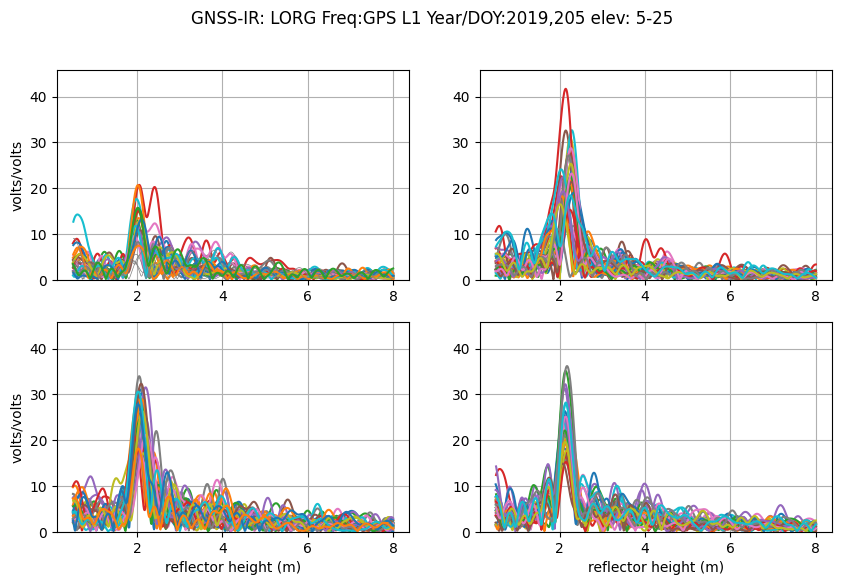

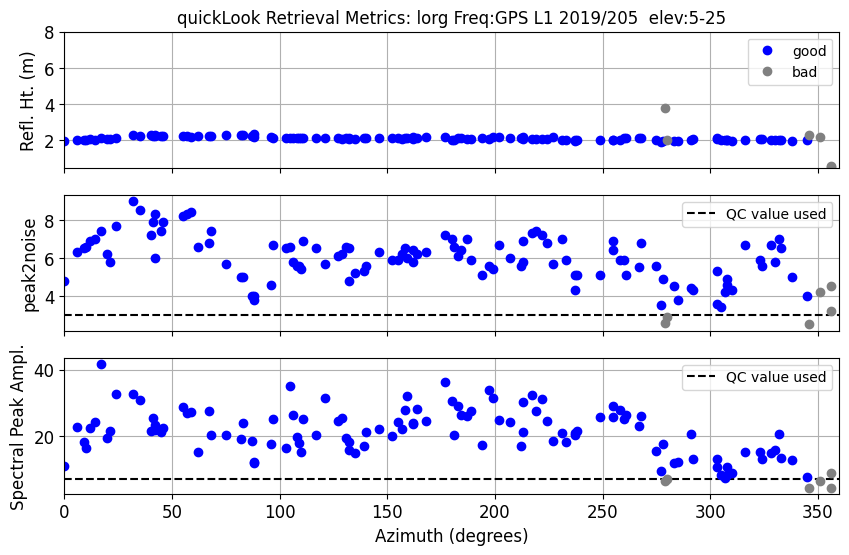

In [9]:
values, metrics = quicklook(station, year, doy=doy)

This looks pretty good. It looks like we will not need an azimuth mask - which makes sense as there are no significant topographic features near the station and so we will use default values for the elevation mask and an azimuth mask is not required.

Compare the periodograms for other frequencies: L2C and L5. They should be similar to the L1 periodogram, except that there will be fewer satellite traces because only GPS satellites launched after 2005 broadcast L2C and only satellites after 2010 broadcast L5. The northwest qudarant is the noisiest and one could certainly try to improve the results by restricting some azimuths there. 

This is for L2C:

minimum elevation angle (degrees) for this dataset:  0.0053
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lorg/quickLook_lsp.png
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lorg/quickLook_summary.png


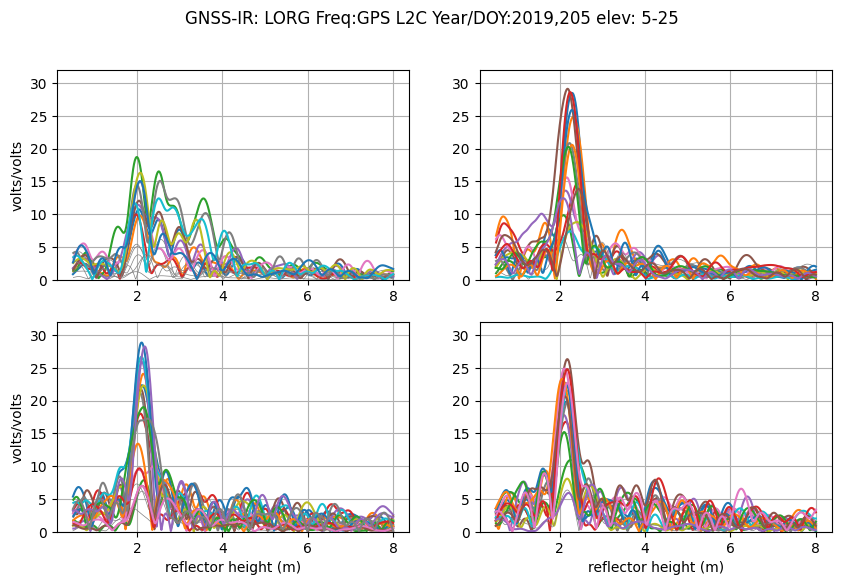

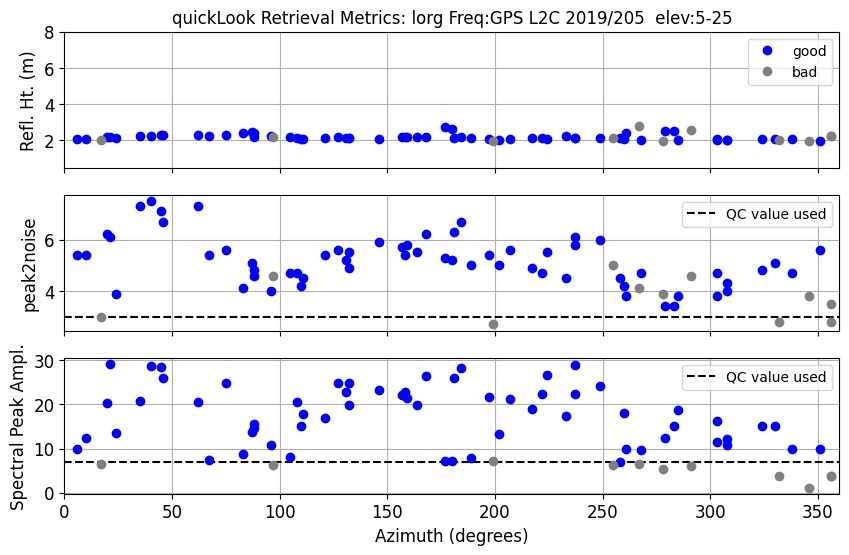

In [10]:
values, metrics = quicklook(station, year, doy=doy, fr=20)

This is for L5:

minimum elevation angle (degrees) for this dataset:  0.0053
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lorg/quickLook_lsp.png
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lorg/quickLook_summary.png


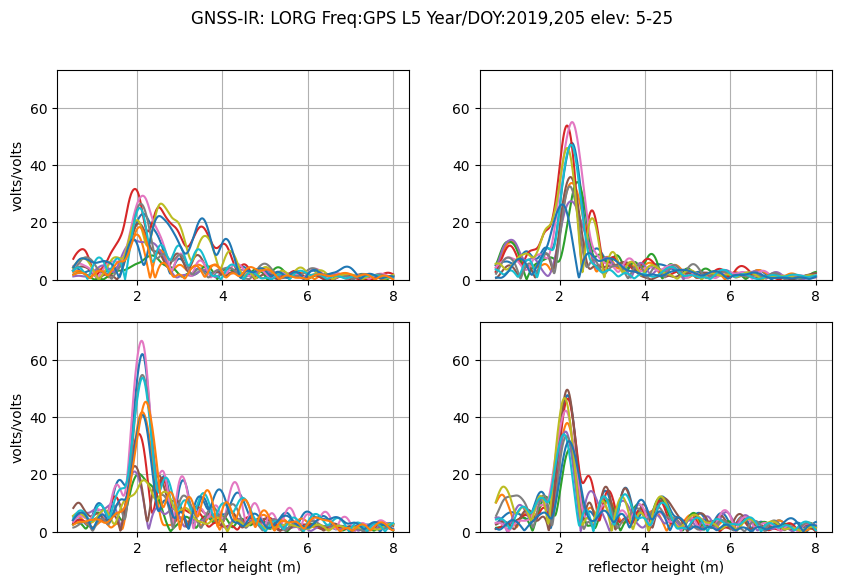

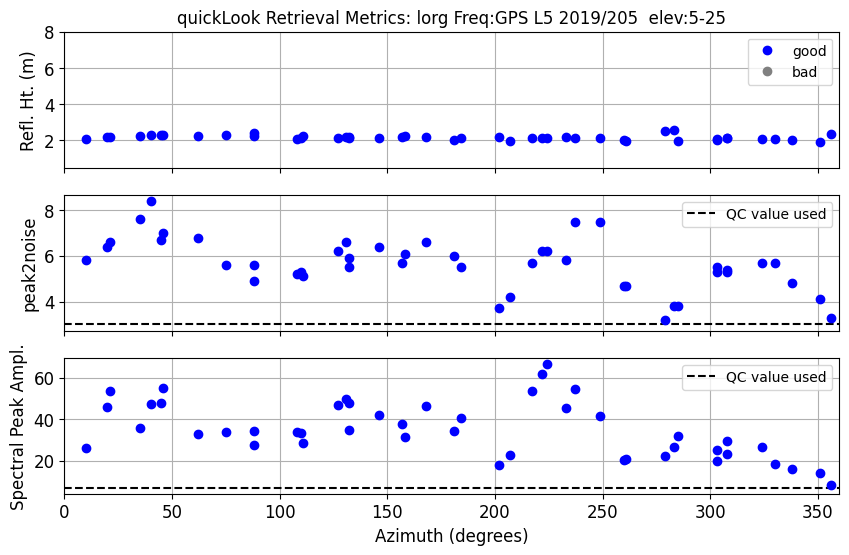

In [11]:
values, metrics = quicklook(station, year, doy=doy, fr=5)

### Analyze the Data

So now we prepare to analyze the data using `gnssir`.
First, we create our set of analysis instructions with `make_gnssir_input`.
The default settings only need the station name.

In [13]:
# we saved the lat, long, and height earlier in the notebook
make_gnssir_input(station)

Assume you want to use the UNR database.
Using standard frequency choices.
writing out to: /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/lorg.json


Next make some snr files for a time span of about eight months. We will do day of year 1 through day of year 233 for the year 2019. We can also restrict the search to the UNAVCO archive to make the
code run faster (otherwise it will check other archives as well).

In [14]:
rinex2snr(station, year=2019, doy=1, doy_end=233, archive='unavco', weekly=weekly.value)

You have invoked the weekly option
lorg  year: 2019  doy: 1 from:  unavco
Requested a GPS only nav file
100% [............................................................................] 101907 / 101907found nav file at SOPAC
Orbit file:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits/2019/nav/auto0010.19n
https://data.unavco.org/archive/gnss/rinex/obs/2019/001/lorg0010.19d.Z
Seeking permission from Earthscope to use their archive


SUCCESS: SNR file was created 
 /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2019/snr/lorg/lorg0010.19.snr66
lorg  year: 2019  doy: 8 from:  unavco
Requested a GPS only nav file
100% [............................................................................] 103405 / 103405found nav file at SOPAC
Orbit file:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits/2019/nav/auto0080.19n
https://data.unavco.org/archive/gnss/rinex/obs/2019/008/lorg0080.19d.Z
Seeking permission from Earthscope to use their archive


SUCCESS: SNR file w

We would then run **gnssir** for the same time range. 

In [15]:
gnssir(station, year=2019, doy=1, doy_end=233)

{'station': 'lorg', 'lat': -78.183646722, 'lon': 170.033616016, 'ht': -7.7216866, 'minH': 0.5, 'maxH': 8.0, 'e1': 5.0, 'e2': 25.0, 'NReg': [0.5, 8.0], 'PkNoise': 2.8, 'polyV': 4, 'pele': [5, 30], 'ediff': 2.0, 'desiredP': 0.005, 'azval2': [0, 360], 'freqs': [1, 20, 5], 'reqAmp': [5.0, 5.0, 5.0], 'refraction': True, 'overwriteResults': True, 'seekRinex': False, 'wantCompression': False, 'plt_screen': False, 'onesat': None, 'screenstats': False, 'pltname': 'lorg_lsp.png', 'delTmax': 75.0, 'gzip': False, 'ellist': []}
refraction file exists
requested frequencies  [1, 20, 5]
Using the New Way of Selecting Arcs
Augmented elevation angle list []
Requested azimuths:  [0, 360]
Using azimuths:  [0, 360]
A station specific refraction output file will be written to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/lorg_refr.txt
found  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/
The large refraction file should be stored here: /Users/kellyenloe/EarthScope/gnssrefl_tim/noteb

Then the **daily_avg** command will calculate the daily average reflector height from the daily output files. To minimize outliers in these daily averages, a median filter is set to allow values within a given value of the median. The user is also asked to set a required minimum number of daily satellite tracks. Here we use 0.25 meters and 50 tracks.

All RH retrievals - including bad ones - will be written to: 
/Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lorg/lorg_allRH.txt.noqc 

All RH retrievals that meet your median filter and ReqTracks criteria will be written to: 
/Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lorg/lorg_allRH.txt 

A total of  35  days were evaluated.
0  days did not meet the threshold set for a dependable daily average
All RH png file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lorg/lorg_AllRH.png
All RH png file without QC saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lorg/lorg_AllRH_noQC.png
Daily average RH png file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lorg/lorg_RH.png
Daily average RH amplitude file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lorg/lorg_RHamp.png
Number of values used in average RH file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lorg/l

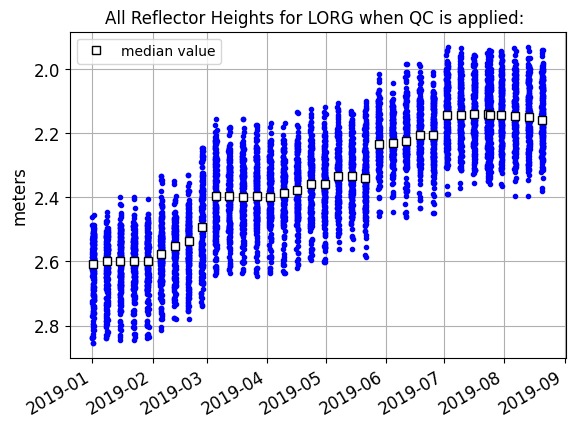

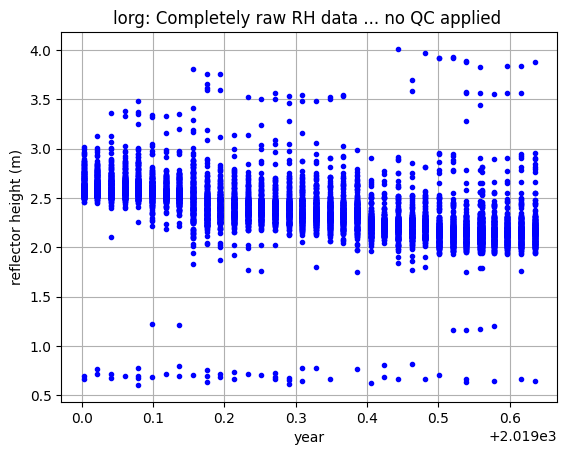

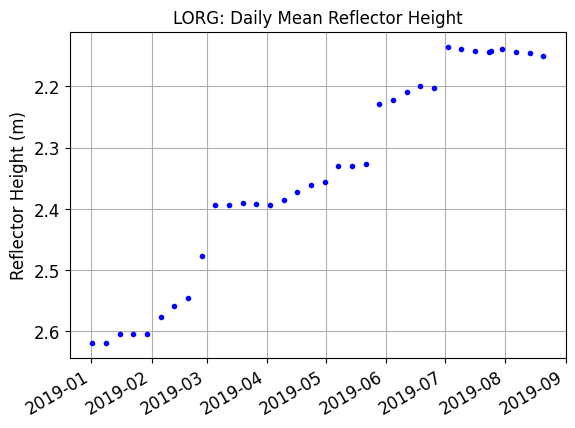

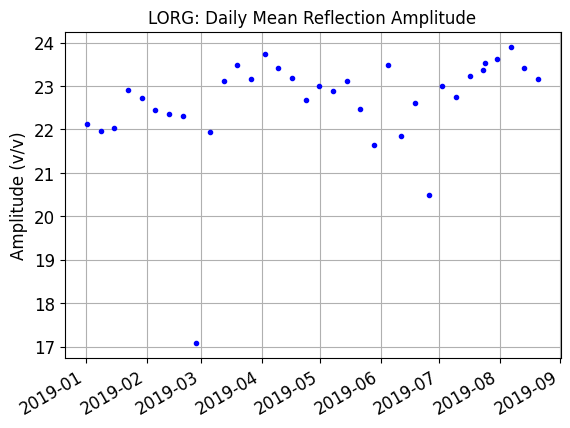

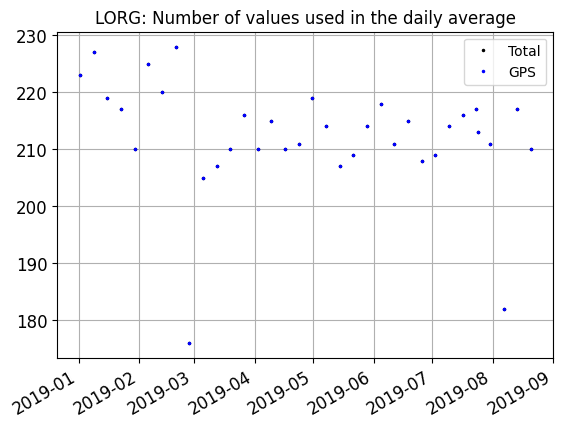


Daily average RH file written to:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lorg/lorg_dailyRH.txt


In [16]:
daily_avg(station, medfilter=.25, ReqTracks=50)

These reflector heights then give information about snow accumulation at lorg. 

We have reversed the y-axis so that the reflector height gets smaller as the snow layer increases and the distance between the antenna and snow surface decreases.